## Importing the dependencies


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#loading the diabetes dataset and analysing
diabetes_dataset=pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
#getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

# 0 -->Non-diabetic
# 1--> Diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Text(0.5, 1.0, 'Correlation Heatmap')

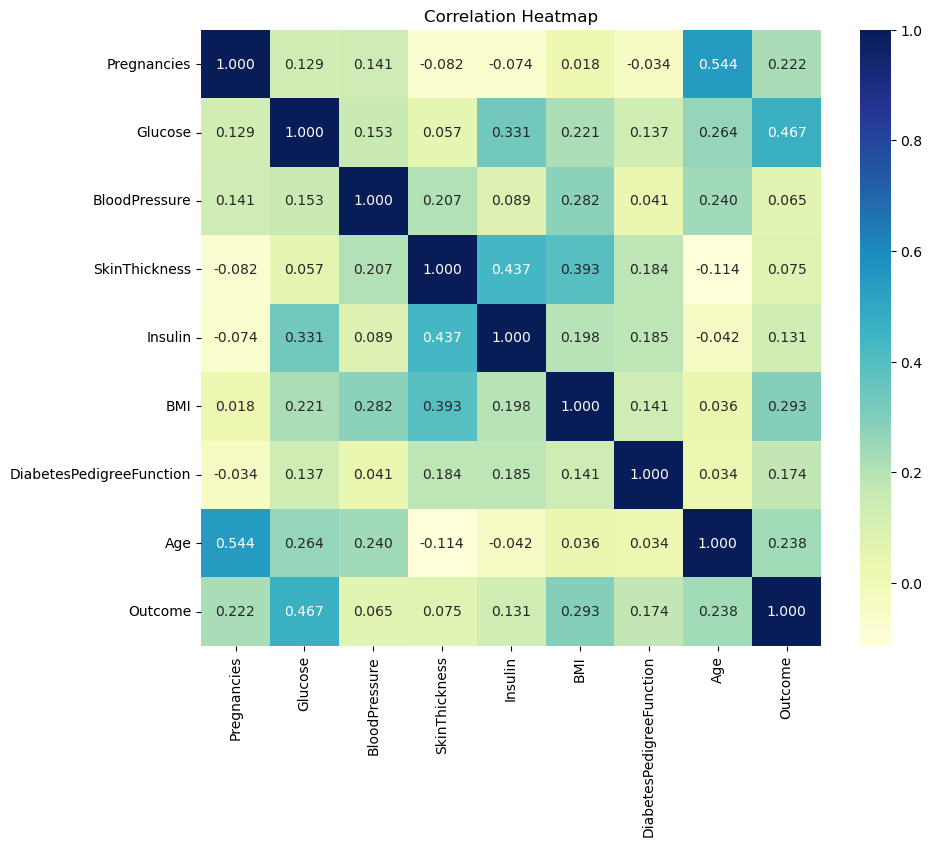

In [8]:
#Correlation plot of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_dataset.corr(), annot=True ,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation Heatmap")

In [10]:
#Replacing 0 values with the mean/median of the respective feature

# Glucose
diabetes_dataset["Glucose"] = diabetes_dataset["Glucose"].replace(0, diabetes_dataset["Glucose"].median())
#BLood pressure
diabetes_dataset["BloodPressure"] = diabetes_dataset["BloodPressure"].replace(0, diabetes_dataset["BloodPressure"].median())
#BMI
diabetes_dataset["BMI"] = diabetes_dataset["BMI"].replace(0,diabetes_dataset["BMI"].mean())
#SKin thickness
diabetes_dataset["SkinThickness"] = diabetes_dataset["SkinThickness"].replace(0, diabetes_dataset["SkinThickness"].mean())
#Insulin
diabetes_dataset["Insulin"] = diabetes_dataset["Insulin"].replace(0, diabetes_dataset["Insulin"].mean())


In [11]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [12]:
#Seperating data and variables
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72      35.000000   79.799479  33.6   
1              1       85             66      29.000000   79.799479  26.6   
2              8      183             64      20.536458   79.799479  23.3   
3              1       89             66      23.000000   94.000000  28.1   
4              0      137             40      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76      48.000000  180.000000  32.9   
764            2      122             70      27.000000   79.799479  36.8   
765            5      121             72      23.000000  112.000000  26.2   
766            1      126             60      20.536458   79.799479  30.1   
767            1       93             70      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standarized_data = scaler.transform(X)

In [18]:
print(standarized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29847711 -0.47378505
  -0.87137393]]


In [19]:
X = standarized_data
Y=diabetes_dataset['Outcome']


In [20]:
print(X)
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29847711 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train test split 

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)

In [22]:
print(X.shape, X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the model

In [23]:
 classifier = svm.SVC(kernel='linear')

In [24]:
#training the support vector machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model evaluation

###### Accuraacy score

In [25]:
#Accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [26]:
print("Accuracy score of the training data : ",training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [27]:
#Accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [28]:
print('Accuracy score of test data :',test_data_accuracy)

Accuracy score of test data : 0.7727272727272727


### Making a predictive system

In [29]:
# input as Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
input_data = (1,146,56,0,0,29.7,0.564,29)

#changing the input_data to a numpy array
input_data_as_numpyarray = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpyarray.reshape(1,-1)

#standardizded the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]== 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[-0.84488505  0.80029521 -1.35553305 -2.76431863 -1.27564498 -0.40035611
   0.2782245  -0.36084741]]
[0]
The person is not diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
